In [43]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xml.etree.cElementTree as ET
import gensim
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,  classification_report,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from nltk.corpus import stopwords
from nltk import pos_tag
import string
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import gensim.downloader as api
import spacy

In [12]:
path = './data/restaurants_laptop_train_with_pos.csv'
df = pd.read_csv(path)
punc = []
for p in string.punctuation:
    punc.append(p)
df["text"] = df.apply(lambda r: r["text"].lower(), axis = 1)
df = df[~df.text.isin(punc)]

In [13]:
encoder = preprocessing.LabelEncoder()
df.loc[:, "aspect_tag"] = encoder.fit_transform(df["aspect_tag"])
df.loc[:, "pos"] = encoder.fit_transform(df["pos"])

df

,num,text,pos,aspect_tag,polarity
0,s_1,i,10,1,0
1,s_1,charge,16,1,0
2,s_1,it,10,1,0
3,s_1,at,1,1,0
4,s_1,night,7,1,0
...,...,...,...,...,...
63226,s_3432,and,4,1,0
63227,s_3432,rice,7,0,0
63228,s_3432,and,4,1,0
63229,s_3432,glass,7,0,0


In [14]:
deleted_row = []
count = 0
text_df = pd.DataFrame()
for word in df["text"].values:
    temp = pd.DataFrame()
    try:
        word_vec = model.wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
        temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
    except:
        deleted_row.append(count)
    count+=1
    text_df = text_df.append(temp, ignore_index = True)
text_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.240523,-1.097983,-2.084826,0.976846,-1.594478,-1.360771,0.001373,1.823453,-2.217603,2.030619,...,3.835833,0.377891,-2.550648,0.046607,0.923595,2.482257,2.844095,2.675508,0.423696,-2.719549
1,-0.296618,-0.840955,-0.032197,0.372685,-1.435094,-1.999525,-1.436370,-0.896368,2.355336,0.784797,...,0.386325,0.389959,-0.970704,-1.975525,-0.581367,-1.376643,-0.071425,-0.256295,-0.109879,-0.152000
2,0.122376,-3.597631,-0.543415,-1.571541,-2.200495,-1.025910,-1.562188,-0.072256,1.533373,1.802501,...,-0.791099,-0.137178,0.539833,-1.095719,1.448149,2.230199,-2.397406,0.844721,1.172839,1.679430
3,-2.510432,-2.201094,-1.233123,4.369335,-0.070418,0.828364,-1.593808,1.630104,1.281306,-0.782943,...,-3.534266,0.986982,-1.258507,-2.842197,-3.232955,2.285178,-2.132370,-0.378812,0.438681,1.141776
4,-0.253056,-2.949493,-0.700285,1.321068,-0.169468,-1.039283,-1.311783,-0.333884,-0.296872,0.305452,...,0.341544,-2.530344,-0.318986,-0.336745,3.022367,0.246383,0.797507,1.012629,1.212733,-0.580640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53907,0.516572,0.003612,-1.771840,0.282748,-0.109071,0.176934,-0.355442,1.557348,1.016160,-1.371511,...,0.057297,0.328124,0.729466,0.615753,0.534078,1.056305,-0.499533,-0.207325,0.019134,-0.604008
53908,0.177389,0.609648,-0.399162,-0.044388,-0.979304,-0.225564,-2.503304,1.480175,-0.782023,-0.377035,...,2.447655,-0.052476,1.275192,-0.408787,0.172195,0.017482,-1.199003,0.302402,-0.969877,1.608790
53909,0.516572,0.003612,-1.771840,0.282748,-0.109071,0.176934,-0.355442,1.557348,1.016160,-1.371511,...,0.057297,0.328124,0.729466,0.615753,0.534078,1.056305,-0.499533,-0.207325,0.019134,-0.604008
53910,-0.016426,-0.272701,-0.663767,0.526449,-2.792960,0.755046,-2.737881,-0.089336,-0.532294,-0.134282,...,0.548832,-0.311080,2.429557,-2.460432,-0.230590,-0.719180,-0.997794,-0.214918,0.325396,1.782098


In [15]:
df = df.drop(df.index[deleted_row])

In [16]:
df = df.reset_index()

In [17]:
text_df["pos"] = df["pos"]
text_df["aspect_tag"] = df["aspect_tag"]
text_df["polarity"] = df["polarity"]


In [18]:
text_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,pos,aspect_tag,polarity
0,-0.240523,-1.097983,-2.084826,0.976846,-1.594478,-1.360771,0.001373,1.823453,-2.217603,2.030619,...,0.046607,0.923595,2.482257,2.844095,2.675508,0.423696,-2.719549,10,1,0
1,-0.296618,-0.840955,-0.032197,0.372685,-1.435094,-1.999525,-1.436370,-0.896368,2.355336,0.784797,...,-1.975525,-0.581367,-1.376643,-0.071425,-0.256295,-0.109879,-0.152000,16,1,0
2,0.122376,-3.597631,-0.543415,-1.571541,-2.200495,-1.025910,-1.562188,-0.072256,1.533373,1.802501,...,-1.095719,1.448149,2.230199,-2.397406,0.844721,1.172839,1.679430,10,1,0
3,-2.510432,-2.201094,-1.233123,4.369335,-0.070418,0.828364,-1.593808,1.630104,1.281306,-0.782943,...,-2.842197,-3.232955,2.285178,-2.132370,-0.378812,0.438681,1.141776,1,1,0
4,-0.253056,-2.949493,-0.700285,1.321068,-0.169468,-1.039283,-1.311783,-0.333884,-0.296872,0.305452,...,-0.336745,3.022367,0.246383,0.797507,1.012629,1.212733,-0.580640,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53907,0.516572,0.003612,-1.771840,0.282748,-0.109071,0.176934,-0.355442,1.557348,1.016160,-1.371511,...,0.615753,0.534078,1.056305,-0.499533,-0.207325,0.019134,-0.604008,4,1,0
53908,0.177389,0.609648,-0.399162,-0.044388,-0.979304,-0.225564,-2.503304,1.480175,-0.782023,-0.377035,...,-0.408787,0.172195,0.017482,-1.199003,0.302402,-0.969877,1.608790,7,0,0
53909,0.516572,0.003612,-1.771840,0.282748,-0.109071,0.176934,-0.355442,1.557348,1.016160,-1.371511,...,0.615753,0.534078,1.056305,-0.499533,-0.207325,0.019134,-0.604008,4,1,0
53910,-0.016426,-0.272701,-0.663767,0.526449,-2.792960,0.755046,-2.737881,-0.089336,-0.532294,-0.134282,...,-2.460432,-0.230590,-0.719180,-0.997794,-0.214918,0.325396,1.782098,7,0,0


In [19]:
# dataset = api.load("text8")  # load dataset as iterable
# model = Word2Vec(dataset)
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
# model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [41]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
   
    print("f1", str(f1_score(label_test, predicted, average='macro')))
    
    
    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(np.unique(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)


In [20]:
train, test = train_test_split(text_df, test_size = 0.2, random_state=42)
X_train = train.drop(columns=['aspect_tag'])
X_test = test.drop(columns = ['aspect_tag'])
y_test= test.aspect_tag.values
y_train = train.aspect_tag.values

In [50]:
lr = LogisticRegression(C=10, random_state = 42, multi_class = 'multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

accuracy: 0.914512277122122
f1 0.8171961371346266
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      6503
           1       0.93      0.97      0.95     36626

    accuracy                           0.91     43129
   macro avg       0.85      0.79      0.82     43129
weighted avg       0.91      0.91      0.91     43129



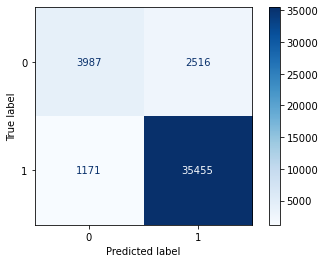

In [51]:
evaluate_model(lr, X_train,y_train)

accuracy: 0.910229064267829
f1 0.8050106734718643
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1597
           1       0.93      0.97      0.95      9186

    accuracy                           0.91     10783
   macro avg       0.84      0.78      0.81     10783
weighted avg       0.90      0.91      0.91     10783



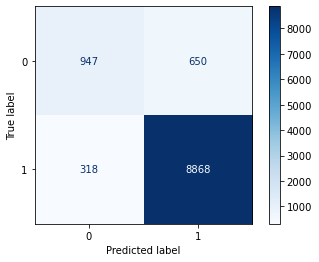

In [52]:
evaluate_model(lr, X_test,y_test)

accuracy: 0.9724083563263697
f1 0.9417925775414557
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      6503
           1       0.97      1.00      0.98     36626

    accuracy                           0.97     43129
   macro avg       0.98      0.91      0.94     43129
weighted avg       0.97      0.97      0.97     43129



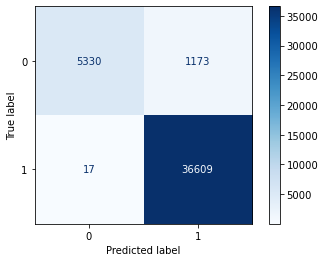

In [62]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_train,y_train)

accuracy: 0.9732912918482797
f1 0.9431589573314401
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1597
           1       0.97      1.00      0.98      9186

    accuracy                           0.97     10783
   macro avg       0.98      0.91      0.94     10783
weighted avg       0.97      0.97      0.97     10783



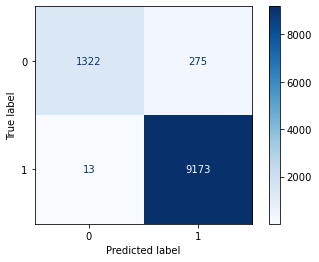

In [60]:
evaluate_model(dt, X_test,y_test)

## Ignore this Section, polarity does not work

In [24]:
train2, test2 = train_test_split(text_df, test_size = 0.2, random_state=42)
X_train2 = train2.drop(columns=['polarity'])
X_test2 = test2.drop(columns = ['polarity'])
y_test2= test2.polarity.values
y_train2 = train2.polarity.values

In [30]:
lr = LogisticRegression(C = 10)
lr.fit(X_train2, y_train2)
pred = lr.predict(X_test2)
pred, y_test2

C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([ 0, -1,  1, ...,  0,  0,  0], dtype=int64),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64))

In [31]:
print('Testing accuracy for polarity: {:.2f}%'.format(lr.score(X_test2, y_test2)*100))

Testing accuracy for polarity: 93.06%
